# Data Visualization Using `plotnine`

The Palmer Penguins dataset had a variety of column types with which to explore some nice visualizations. The `mtcars` dataset is another popular dataset for doing some simple data work, but does not contain the same types of variables.

Run the following code to load the `mtcars` dataset and explore the observations and variables contained within. To learn more about this dataset check out [this site](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html)

In [57]:
import statsmodels.api as sm
import pandas as pd
from plotnine import ggplot, aes, geom_boxplot, geom_histogram, geom_point, geom_bar, ggtitle, xlab, ylab, scale_fill_discrete, scale_fill_gradient
import seaborn as sns
import matplotlib.pyplot as plt

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)

In [58]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


The statement "the `mtcars` dataset does not contain the same types of variables as the penguins dataset" is a little true and a little false. There are no variables that contain text values, BUT there are variables that it makes sense to consider categorical variables. In most situations, it makes sense to treat the values of categorical variables as text values instead of numeric values.

Use the `astype()` method to convert the categorical variables of the `mtcars` (df) dataset to have text values in the code chunk below. We've done one for you!

In [59]:
df["am"] = df["am"].astype('category') 
# Convert the other variables below
#cylinders
df["cyl"] = df["cyl"].astype('category')
#engine type
df["vs"] = df["vs"].astype('category')
#check to ensure correct data types
print(df.dtypes)

mpg      float64
cyl     category
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs      category
am      category
gear       int64
carb       int64
dtype: object
mpg      float64
cyl     category
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs      category
am      category
gear       int64
carb       int64
dtype: object


If you print out your new dataset, is it clear that the variables have been converted to text values? If so, how can you tell?

Yes it is clear that the variables have been converted to text values. Using df.dtypes we can see that cyl, vs, and am are all listed as "objects" indicating how plotnine treats the variables and the fact that they are all considered strings.

It should also be clear by how `plotnine` treats these variables.

1. Create side-by-side boxplots of the `mpg` variable by the different values of the `am` variable. What happens if you convert the `am` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

The plot with 'am' as a categorical variable has two boxplots, one at 0 and one at 1, which represent automatic and manual transmission methods. The plot with 'am' as a float variable creates on boxplot at 0.5, taking the average between 0 and 1 and treating the variable as quantitative.

2. Create overlaid histograms of the `hp` variable for the different values of the `cyl` variable. What happens if you convert the `cyl` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

The two plots have the same shape, but the plot with 'cyl' as a categorical variable colors the plot by the category, while the plot with 'cyl' as a float variable does not fill the plot with colors (essentially does not overlay because it would need to be on a gradient style coloring scheme if continuous/quantitative).

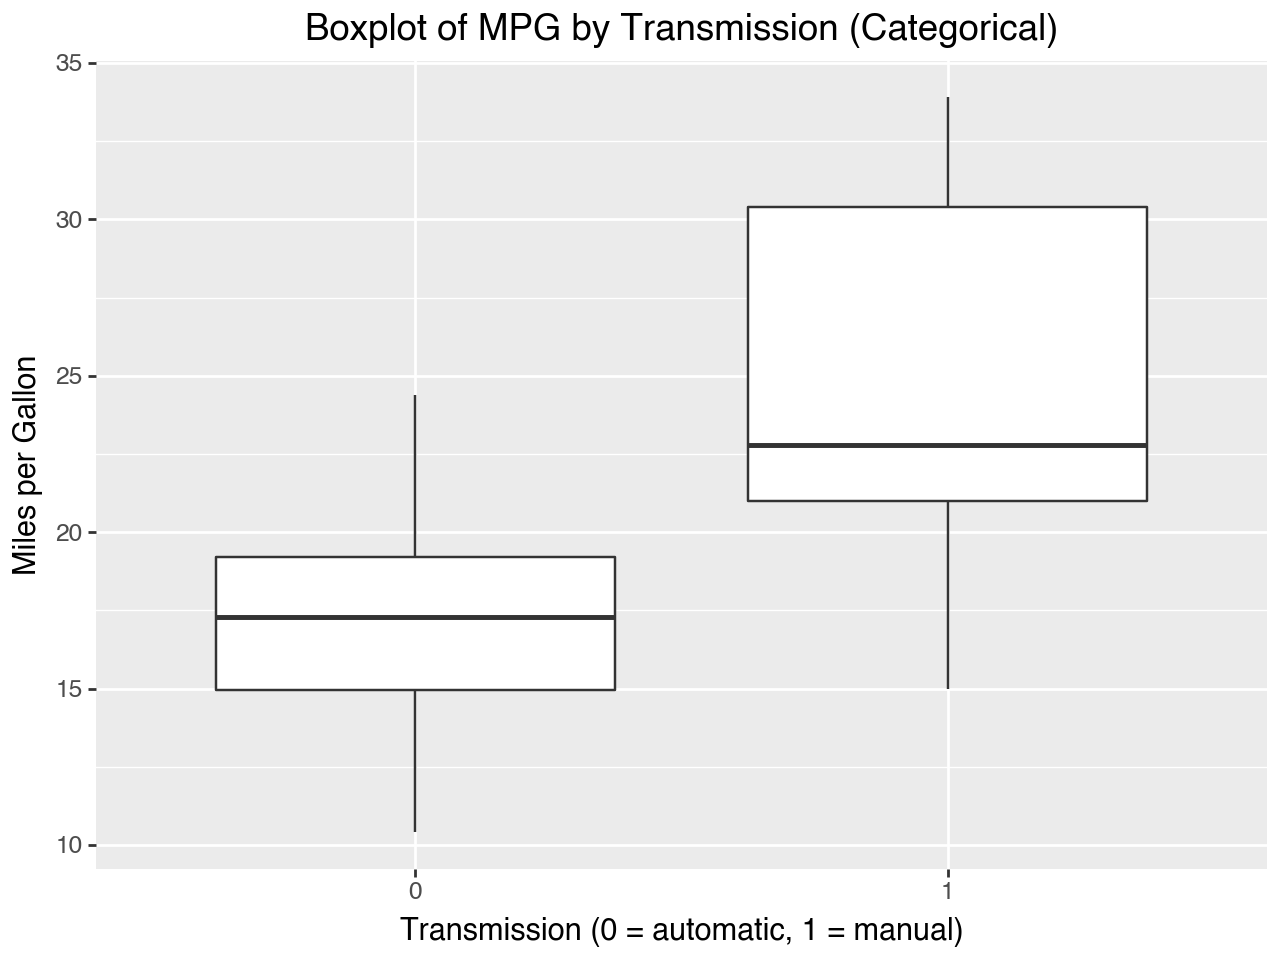

In [60]:
# Create plot for (1) here
#plotting as categorical
(ggplot(df, aes(x=df['am'].astype('category'), y = "mpg"))
+ geom_boxplot()
+ ggtitle("Boxplot of MPG by Transmission (Categorical)")
+ xlab("Transmission (0 = automatic, 1 = manual)")
+ ylab("Miles per Gallon")
)

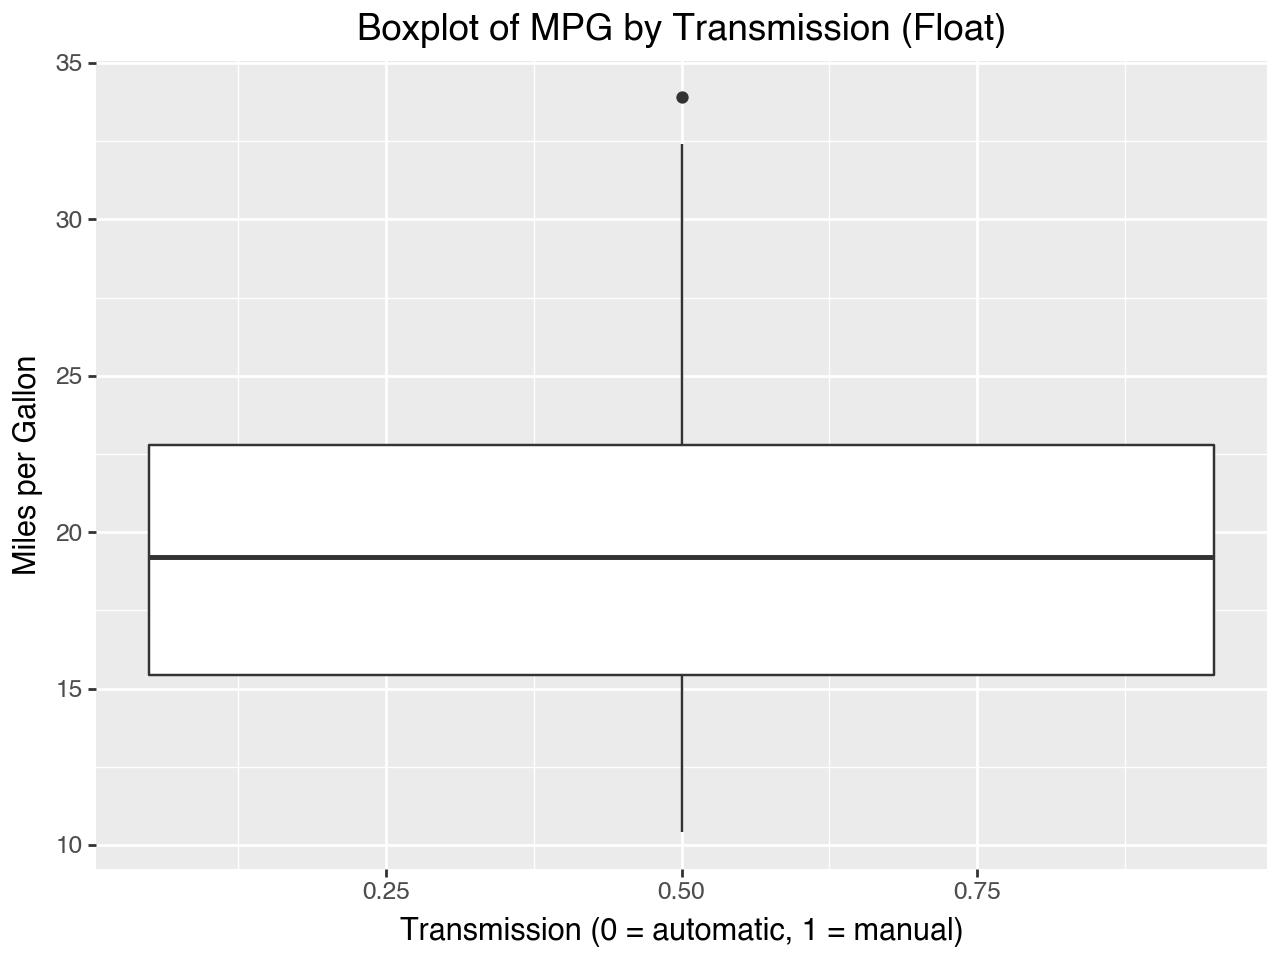

In [61]:
#plotting as float
(ggplot(df, aes(x=df['am'].astype(float), y="mpg"))
+ geom_boxplot()
+ ggtitle("Boxplot of MPG by Transmission (Float)")
+ xlab("Transmission (0 = automatic, 1 = manual)")
+ ylab("Miles per Gallon")
)

/opt/anaconda3/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.


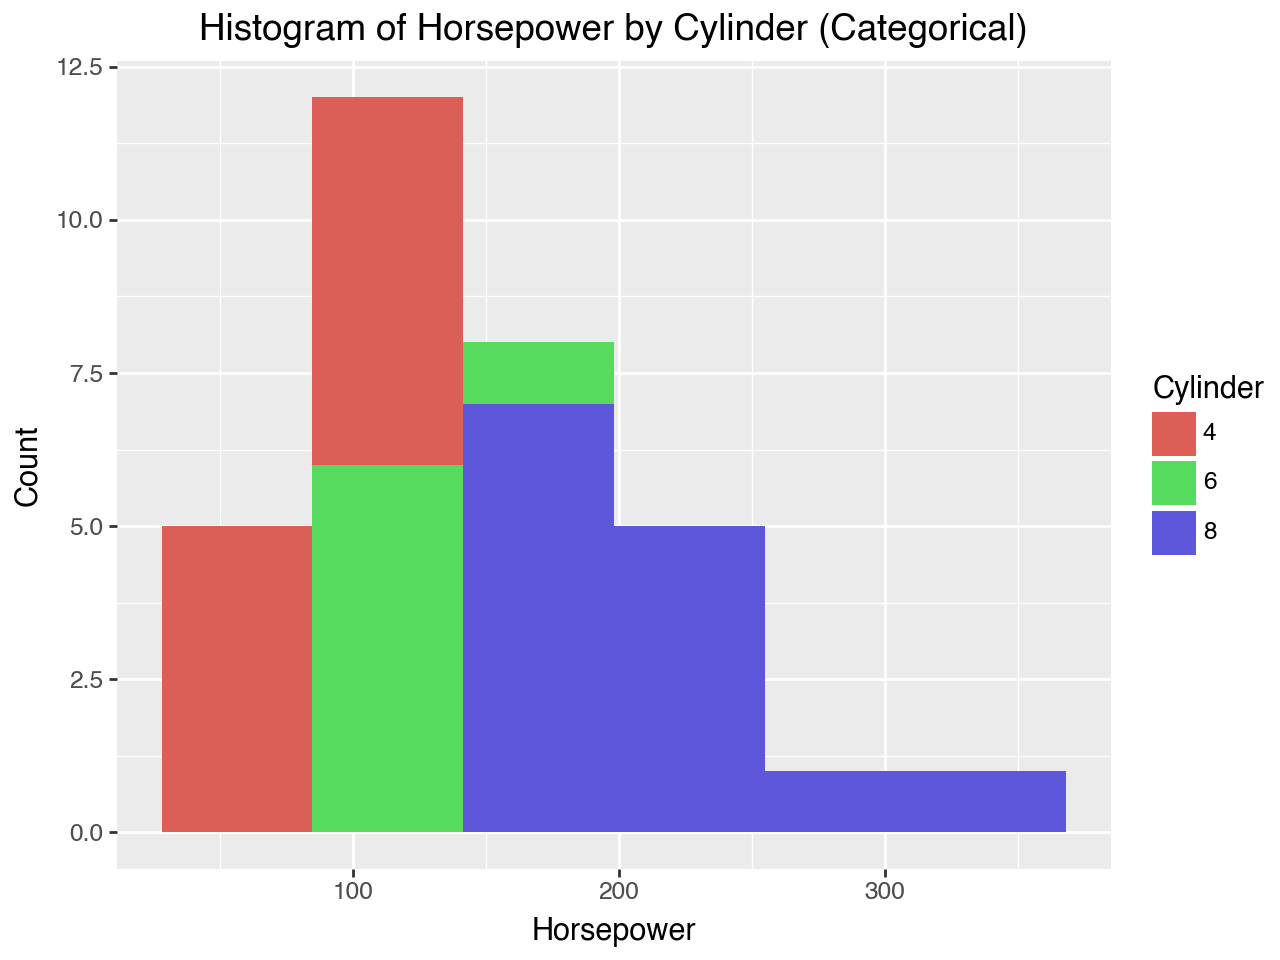

In [62]:
# Create plot for (2) here
#plotting as categorical
df["cyl"] = df["cyl"].astype('category')
(ggplot(df, aes(x="hp", fill="cyl"))
+ geom_histogram()
+ scale_fill_discrete(name="Cylinder") 
+ ggtitle("Histogram of Horsepower by Cylinder (Categorical)")
+ xlab("Horsepower")
+ ylab("Count")
)          


/opt/anaconda3/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.


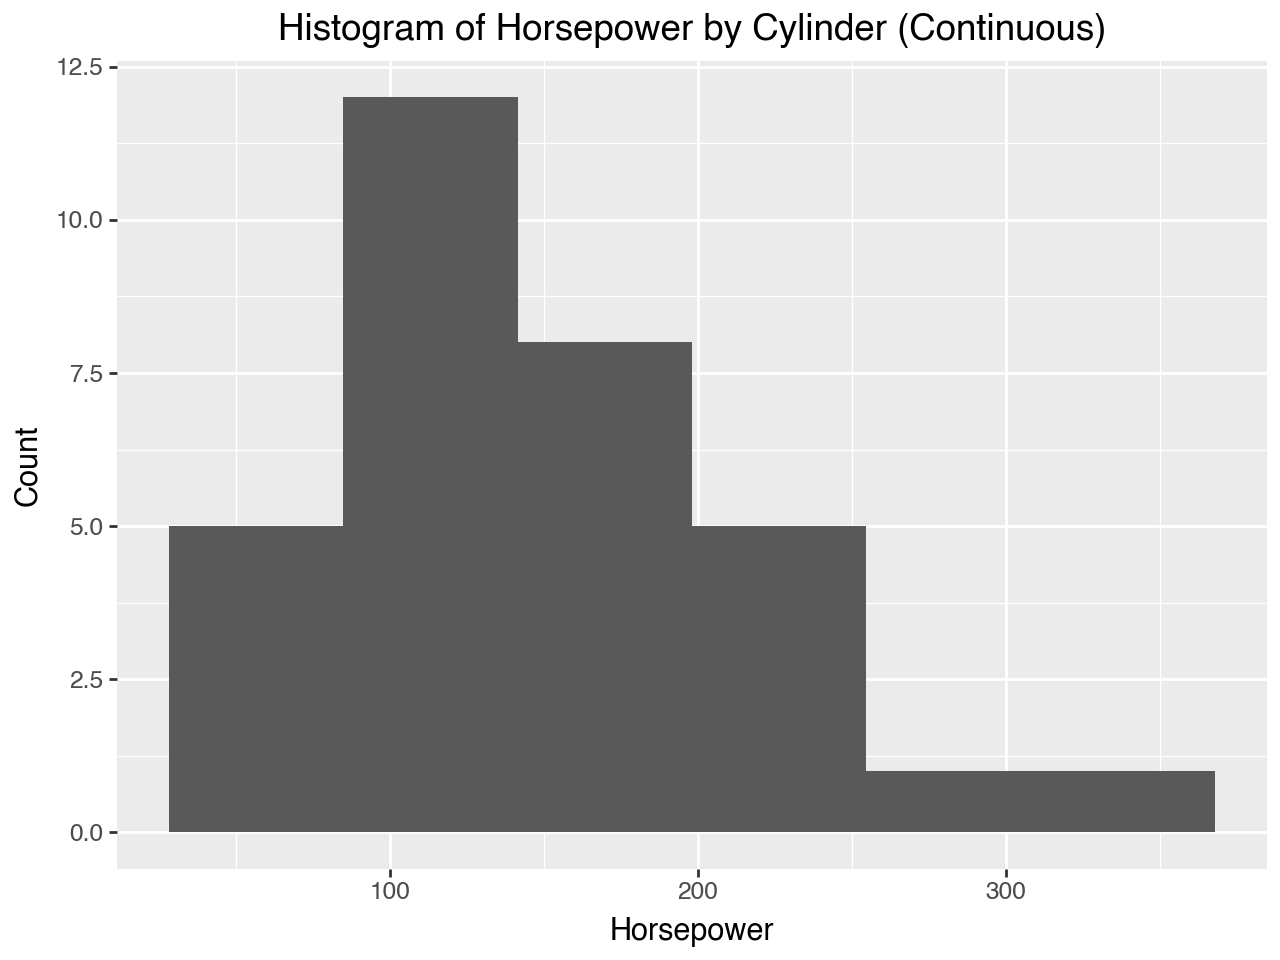

In [63]:
#plotting as float
df["cyl_f"] = df["cyl"].astype(float)
(ggplot(df, aes(x="hp", fill="cyl_f"))
+ geom_histogram()
+ ggtitle("Histogram of Horsepower by Cylinder (Continuous)")
+ xlab("Horsepower")
+ ylab("Count")
) 

Some of these variables, like the `cyl` variable, have numeric values that actually make sense as numbers (i.e. the number of cylinders in the engine). However, it doesn't make the most sense to "do math" with this type of variable (e.g. take averages and such) because there are so few different value this can take on AND they're an explicit choice made by the car manufacturer. So, it makes more sense to treat the `cyl` variable as a categorical variable despite it having numeric values.

You will need to keep these kinds of nuances about data in mind as you work with an increasing variety and richness of data, and do more complex things with them.

Choose 3 new `geometries` from the [data-to-viz website](https://www.data-to-viz.com/) for graphs that you'd like to explore using the `mtcars` dataset, and then create those graphs!

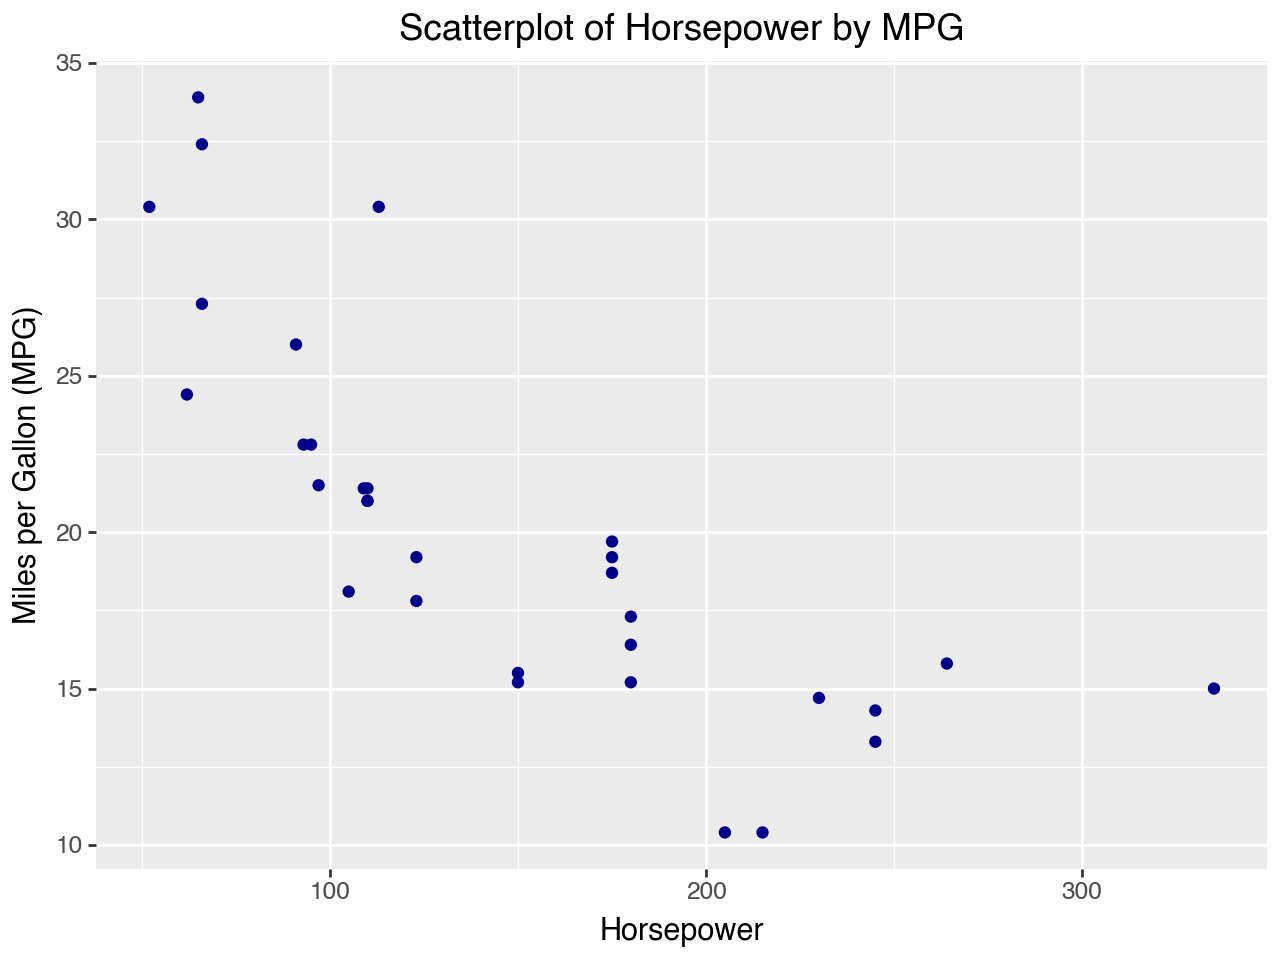

In [64]:
# Create plot with first new geometry here
#scatterplot
(ggplot(df, aes( x = "hp", y = "mpg"))
+ geom_point(color = 'darkblue')
+ ggtitle("Scatterplot of Horsepower by MPG")
+ xlab("Horsepower")
+ ylab("Miles per Gallon (MPG)")
)

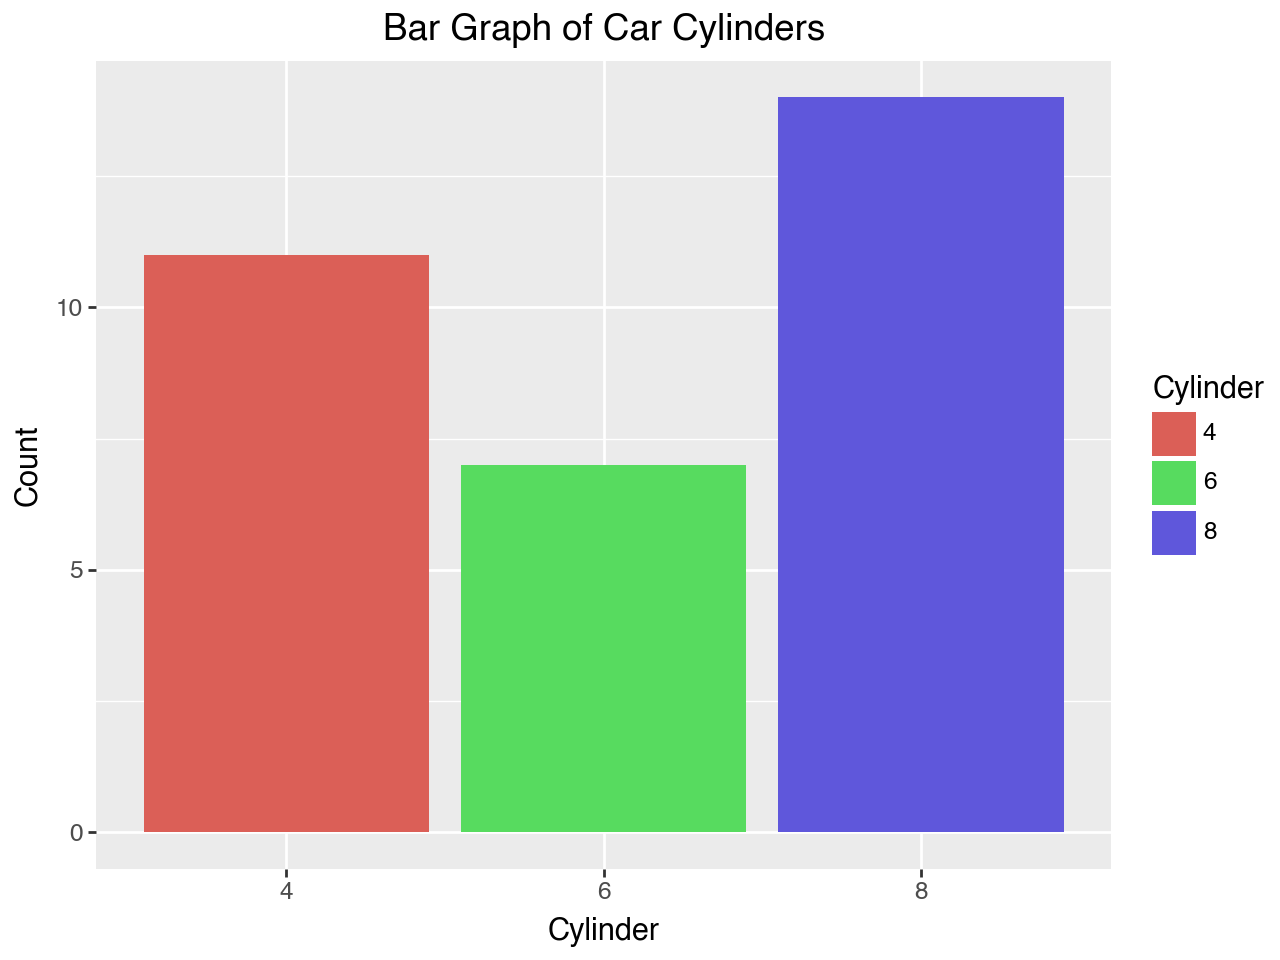

In [65]:
# Create plot with second new geometry here
#bar plot
(ggplot(df, aes(x = "factor(cyl)", fill = 'factor(cyl)'))
+ geom_bar()
+ ggtitle("Bar Graph of Car Cylinders")
+ scale_fill_discrete(name="Cylinder")
+ xlab("Cylinder")
+ ylab("Count")
)

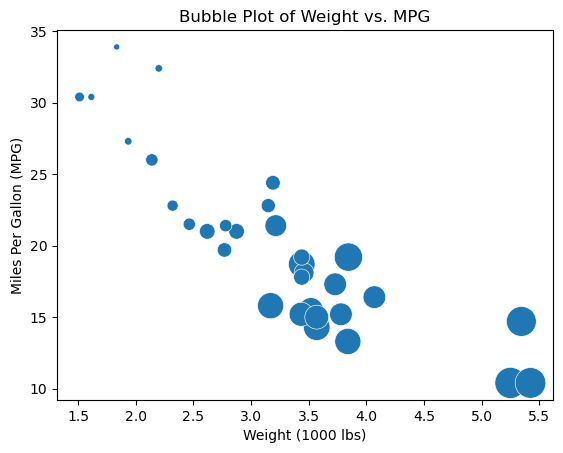

In [66]:
# Create plot with third new geometry here
#scatter plot
sns.scatterplot(data=df, x="wt", y="mpg", size="disp", legend=False, sizes=(20, 500))
#axis labels and title
plt.xlabel("Weight (1000 lbs)") 
plt.ylabel("Miles Per Gallon (MPG)")
plt.title("Bubble Plot of Weight vs. MPG")
#display plot
plt.show()